In [52]:
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import pandas as pd
import sys
module_dir = '/work/magroup/ehaber/space-gm'
sys.path.append(module_dir)
import spacegm

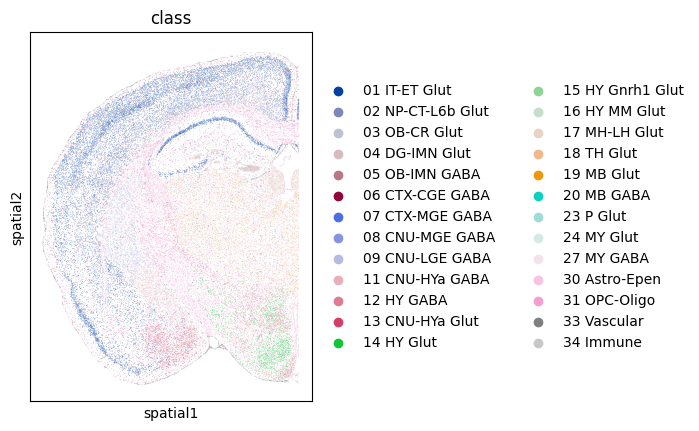

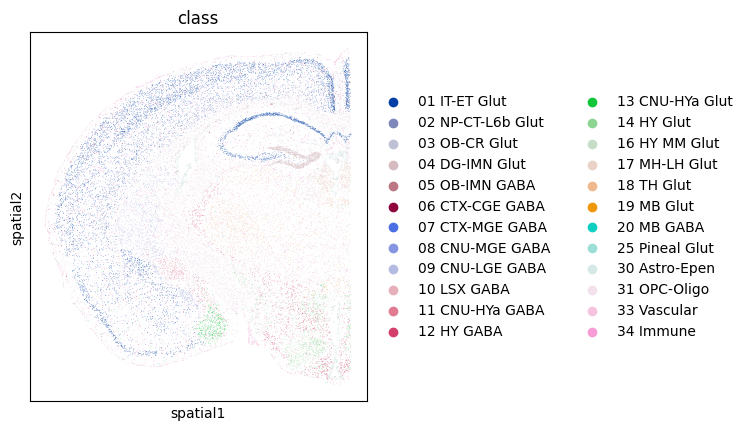

In [3]:
slice1 = sc.read_h5ad('/work/magroup/skrieger/LLOKI_datasets/Three-slices/M500.h5ad')
slice2 = sc.read_h5ad('/work/magroup/skrieger/LLOKI_datasets/Three-slices/M1100.h5ad')
slice3 = sc.read_h5ad('/work/magroup/skrieger/LLOKI_datasets/Three-slices/smp.h5ad')

sc.pl.spatial(slice1, color='class', spot_size=0.01)
sc.pl.spatial(slice2, color='class', spot_size=0.01)


In [9]:
slice1.obsm['spatial'][:,0]

array([4.58530563, 4.54657941, 4.58839819, ..., 3.549667  , 2.67223075,
       4.61318428])

In [43]:
def preprocess_data(adata):
    spatial_coords = adata.obsm['spatial']
    cell_types = adata.obs['class']
    print(adata.obs['parcellation_structure'])
    region = adata.obs['parcellation_structure']
    df = pd.DataFrame(spatial_coords, columns=['X', 'Y'])
    df['CELL_TYPE'] = cell_types.values
    df['REGION_ID'] = region.values
    

    return df
    

In [44]:
merf500 = preprocess_data(slice1)
merf1100 = preprocess_data(slice2)

cell_label
1017092617101530168-1      DG
1017092617101290732        DG
1017092617101300625-1      DG
1017092617101540136-1      DG
1017092617201530076        DG
                         ... 
1017092617100790950       CA1
1017092617202940394       MEA
1017092617100800347      VISa
1017092617103160118       BMA
1017092617101540651-1      DG
Name: parcellation_structure, Length: 60093, dtype: category
Categories (87, object): ['AIp', 'ARH', 'AUDd', 'AUDv', ..., 'mfbc', 'mfsbshy', 'scwm-unassigned', 'unassigned']


KeyError: 'parcellation_structure'

In [42]:
slice1.obs['parcellation_structure']

cell_label
1017092617101530168-1      DG
1017092617101290732        DG
1017092617101300625-1      DG
1017092617101540136-1      DG
1017092617201530076        DG
                         ... 
1017092617100790950       CA1
1017092617202940394       MEA
1017092617100800347      VISa
1017092617103160118       BMA
1017092617101540651-1      DG
Name: parcellation_structure, Length: 60093, dtype: category
Categories (87, object): ['AIp', 'ARH', 'AUDd', 'AUDv', ..., 'mfbc', 'mfsbshy', 'scwm-unassigned', 'unassigned']

In [45]:
slice2

AnnData object with n_obs × n_vars = 37068 × 1122
    obs: 'brain_section_label', 'cell_label', 'brain_section_labelr', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z', 'subclass_confidence_score', 'cluster_confidence_score', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color'
    var: 'ensembl'
    uns: 'class_colors'
    obsm: 'spatial'

In [36]:
slice1

AnnData object with n_obs × n_vars = 60093 × 550
    obs: 'brain_section_label', 'cell_label', 'brain_section_labelr', 'cluster_alias', 'average_correlation_score', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'x_section', 'y_section', 'z_section', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'x_reconstructed', 'y_reconstructed', 'z_reconstructed', 'parcellation_index', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_organ', 'parcellation_category', 'parcellation_division', 'parcellation_structure', 'parcellation_substructure', 'parcellation_organ_color', 'parcellation_category_color', 'parcellation_division_color', 'parcellation_structure_color', 'parcellation_substructure_color'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'class_colors', 'src', 'parcellation_structure_color_colors'
    obsm: 'spatial'

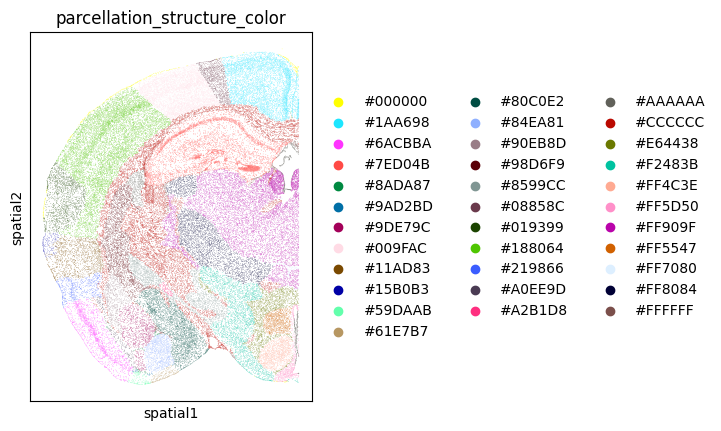

In [47]:
sc.pl.spatial(slice1, color='parcellation_structure_color', spot_size=0.01)


In [50]:
data = sc.read_h5ad('/work/magroup/ehaber/UCE/data/MERFISH_BICCN/scref_full.h5ad')

In [51]:
data

AnnData object with n_obs × n_vars = 250040 × 32285
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label', 'cell_barcoder', 'barcoded_cell_sample_label', 'library_labelr', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'